In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

x, y = twospirals(400)
x, y = x/10, y.reshape(-1)
xx, yy = np.array(x), np.reshape(y, (-1,1))
print(x.shape, y.shape)

(800, 2) (800,)


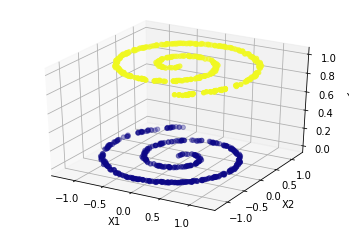

In [3]:
x1 = xx[:,0]
x2 = xx[:,1]

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1, x2, y, c=y, cmap='plasma')
# ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

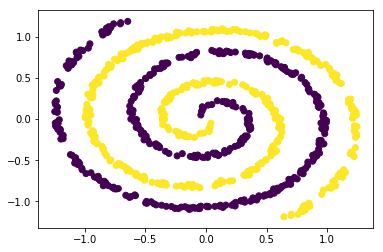

In [4]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=y)

### Using Neural Network

In [5]:
n_hidden = 1
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)
layer3 = tnn.Sigmoid()
# def reposition_break_if_necessary(self:tnn.DoubleReluLinearLayer):
#     pass

In [6]:
%matplotlib tk

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = tnn.CrossEntropyBinary().loss(yout, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(x1, x2, y, c=y, cmap='plasma')
        ax.scatter(x1, x2, yout, c=(yout>0.5).reshape(-1), cmap='plasma')#, c=yout, cmap='plasma')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.6881727038989639


100 Error =  0.6764701654619816


200 Error =  0.6764833855893917


300 Error =  0.6764839504806187


400 Error =  0.6764841874465571


500 Error =  0.6764841192751149


600 Error =  0.6764840267003536


700 Error =  0.6764841588970504


800 Error =  0.676484023960225


900 Error =  0.6764840452203511


1000 Error =  0.6764833609383778


1100 Error =  0.6764833047470477


1200 Error =  0.6764777535763676


1300 Error =  0.6764776018084401


1400 Error =  0.6764774026435856


1500 Error =  0.6764776998973874


1600 Error =  0.6764777887022012


1700 Error =  0.6764775427232936


1800 Error =  0.6764779774817953


1900 Error =  0.6764776575909656


2000 Error =  0.6764775362476939


2100 Error =  0.6764777064747297


2200 Error =  0.6764774902143862


2300 Error =  0.6764777949930836


2400 Error =  0.6764777317642077


2500 Error =  0.6764775561287447


2600 Error =  0.6764777598243051


2700 Error =  0.6764779951230931


2800 Error =  0.6764776347750859


TclError: invalid command name "pyimage11"

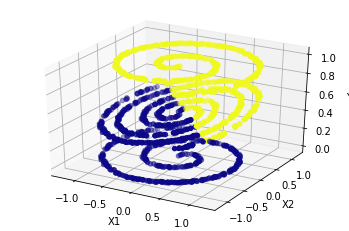

In [7]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1, x2, y, c=y, cmap='plasma')
ax.scatter(x1, x2, yout, c=(yout>0.5).reshape(-1), cmap='plasma')#, c=yout, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [8]:
error = tnn.CrossEntropyBinary().loss(yout, yy)
pre_err = error
error_list = [error,]

## Repeat steps below to add new neuron to the network

In [9]:
from copy import deepcopy

### Adding new neurons at some point with zero output 

In [20]:
new_neurons = 2
noise_new = 0.0
noise_old = 0.0
noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1.weights.shape)
noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1.bias.shape)

layer1c = deepcopy(layer1)
layer2c = deepcopy(layer2)

l1_add = tnn.LinearLayer(2, new_neurons, optimizer=optimizer)
l2_add = tnn.DoubleReluLinearLayer(new_neurons, 1, optimizer=optimizer)

new_w1 = np.hstack([layer1.weights+noise_old_w1, l1_add.weights])
new_b1 = np.hstack([layer1.bias+noise_old_b1, l1_add.bias])

i, o = layer2.weights.shape
i_, o_ = l2_add.weights.shape
new_w2_ = np.concatenate([layer2.weights.reshape(2,i//2,o),
                          l2_add.weights.reshape(2,i_//2,o_)*noise_new],
                         axis=1)
new_w2 = new_w2_.reshape(-1, o)
new_b2 = deepcopy(layer2.bias)

## Creating a new network with added neuron

In [21]:
optimizer = tnn.Adam()
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden,
                             weights=new_w1, bias=new_b1,
                             optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1,
                          weights=new_w2, bias=new_b2,
                          optimizer=optimizer)
layer3 = tnn.Sigmoid()

In [22]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = tnn.CrossEntropyBinary().loss(yout, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        out = (yout>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5762542364348406


100 Error =  0.5758280947113756


200 Error =  0.5758152091781811


300 Error =  0.5758015554238893


400 Error =  0.5757630452749418


500 Error =  0.5757202509610039


600 Error =  0.5756542029789337


700 Error =  0.575632748284458


800 Error =  0.5755835642349583


900 Error =  0.5755287201161714


1000 Error =  0.5754894930197275


1100 Error =  0.5754377479589701


1200 Error =  0.5753772999307175


1300 Error =  0.5753930818882494


1400 Error =  0.5754723119276913


1500 Error =  0.5753984122525556


1600 Error =  0.5754132619290128


1700 Error =  0.5753896224824349


1800 Error =  0.5753889804885165


1900 Error =  0.5753687127852315


2000 Error =  0.5753029327681772


2100 Error =  0.5753674882347178


2200 Error =  0.5752919661479988


2300 Error =  0.5753366468916067


2400 Error =  0.575430556799576


2500 Error =  0.5753876351639768


2600 Error =  0.5753750644700918


2700 Error =  0.5753403087695409


2800 Error =  0.5753424033594774



TclError: invalid command name "pyimage46"

In [23]:
pre_err - error   ### ---> the more the better

0.0009927813428575183

In [24]:
pre_err = error
error_list.append(error)

#### If the additional neuron was not helpful, reset the network

In [ ]:
layer1 = deepcopy(layer1c)
layer2 = deepcopy(layer2c)

#### Total number of neurons

In [25]:
n_hidden = len(layer1.bias)
n_hidden

7

#### Plots

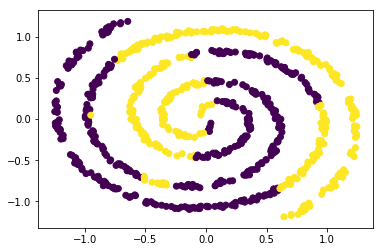

In [26]:
%matplotlib inline
yout = net.forward(xx)
out = (yout>0.5).reshape(-1)
plt.scatter(x1, x2, c=out)

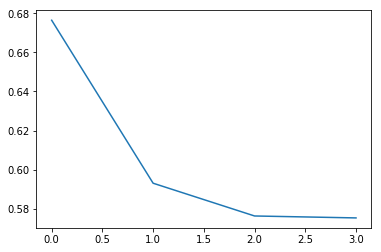

In [27]:
plt.plot(error_list)

### Training the same network end to end -- for comparision

In [28]:
optimizer = tnn.Adam()
net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)
layer3_ = tnn.Sigmoid()

In [29]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout_ = net_.forward(xx)
    dy_ = yout_ - yy
    dx_ = net_.backward(dy_)
    
    net_.update()
    
    if epoch%100 == 0:
        error_ = tnn.CrossEntropyBinary().loss(yout_, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error_)
        ax.clear()
        
        out = (yout_>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error_ < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.817121854133498


100 Error =  0.6728948940229487


200 Error =  0.6543319098300117


300 Error =  0.6362627774526735


400 Error =  0.6314634218577161


500 Error =  0.6272744119201691


600 Error =  0.6252996497581096


700 Error =  0.6240339302875796


800 Error =  0.6234887817048159


900 Error =  0.6233154847374385


1000 Error =  0.6231004390360884


1100 Error =  0.623104233690539


1200 Error =  0.6228802867118577


1300 Error =  0.6230049104575549


1400 Error =  0.622877688552213


1500 Error =  0.6228811821523769


1600 Error =  0.6228391301216835


1700 Error =  0.6227481387606507


1800 Error =  0.6228834151347704


1900 Error =  0.6228251858803752


2000 Error =  0.6227888845736491


2100 Error =  0.6227517461062819


2200 Error =  0.6227125586339192


2300 Error =  0.6227659960492065


2400 Error =  0.6227480419480231


2500 Error =  0.6227085469074303


2600 Error =  0.6227407794970544


2700 Error =  0.6227752257470801


2800 Error =  0.6227242307666284




TclError: invalid command name "pyimage57"

In [30]:
error, error_

(0.5752544677034497, 0.6226907303629008)

## Add New Layer to the last layer

In [31]:
n_hidden2 = 7
optimizer = tnn.SGD()
w2_layer = tnn.WeightsLayer(n_hidden*2, n_hidden2, optimizer=optimizer)
w3_layer = tnn.WeightsLayer(n_hidden2, 1, optimizer=optimizer)

for epoch in range(100000):
    wout = w3_layer.forward(w2_layer.weights)
    dw = wout - layer2.weights
    dw2 = w3_layer.backward(dw/dw.shape[1]) 
    w2_layer.del_weights = dw2
    
    w2_layer.update()
    w3_layer.update()
    
    if epoch%10000 == 0:
        error__ = (dw**2).mean()
        print(epoch, 'Error = ', error__)

0 Error =  11.784193737896455
10000 Error =  1.5406989025057324e-29
20000 Error =  1.5406989025057324e-29
30000 Error =  1.5406989025057324e-29
40000 Error =  1.5406989025057324e-29
50000 Error =  1.5406989025057324e-29
60000 Error =  1.5406989025057324e-29
70000 Error =  1.5406989025057324e-29
80000 Error =  1.5406989025057324e-29
90000 Error =  1.5406989025057324e-29


In [32]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden,
                          weights=copy.deepcopy(layer1.weights),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, n_hidden2,
                                    weights=copy.deepcopy(w2_layer.weights),
                                    optimizer=optimizer)
layer3_ = tnn.DoubleReluLinearLayer(n_hidden2,1,
                                    weights=np.vstack([w3_layer.weights,w3_layer.weights]),
                                    bias = copy.deepcopy(layer2.bias),
                                    optimizer=optimizer)
layer4_ = tnn.Sigmoid()

In [33]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout_ = net_.forward(xx)
    dy_ = yout_ - yy
    dx_ = net_.backward(dy_)
    
#     net_.update()
    layer2_.update()
    layer3_.update()
    
    if epoch%100 == 0:
        error_ = tnn.CrossEntropyBinary().loss(yout_, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error_)
        ax.clear()
        
        out = (yout_>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error_ < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5753820970475897


100 Error =  0.5644336736085852


200 Error =  0.546165176769673


300 Error =  0.5047981548664072


400 Error =  0.4335143074970442


500 Error =  0.35723267785357643


600 Error =  0.3283987567255347


700 Error =  0.31112791678635576


800 Error =  0.2634370837318349


900 Error =  0.24312736864918885


1000 Error =  0.23726207126435261


1100 Error =  0.23401691585243145


1200 Error =  0.23203057055298806


1300 Error =  0.23071477007338487


1400 Error =  0.2303347391632746


1500 Error =  0.23046558871920703


1600 Error =  0.23100538849983948


1700 Error =  0.23230742450222827


1800 Error =  0.23481836371703652


1900 Error =  0.23897700399989089


2000 Error =  0.2460106479587317


2100 Error =  0.2569215001300842


2200 Error =  0.23167475993127024


2300 Error =  0.18053494305441528


2400 Error =  0.17312436324977193


2500 Error =  0.1691838460368154


2600 Error =  0.16682357159905173


2700 Error =  0.16517345798812408


2800 Error =  0.



22800 Error =  0.17956215411006965


22900 Error =  0.17964205427991878


23000 Error =  0.1797234339203628


23100 Error =  0.1798060513581483


23200 Error =  0.17988936923369891


23300 Error =  0.1799736948993093


23400 Error =  0.18005868167938227


23500 Error =  0.1801445546716388


23600 Error =  0.18023077615414473


23700 Error =  0.18031823710968362


23800 Error =  0.18040505527165962


23900 Error =  0.18049209790715803


24000 Error =  0.18058043910705984


24100 Error =  0.18066863809211875


24200 Error =  0.18075552352203267


24300 Error =  0.18084282512190228


24400 Error =  0.18092942469710935


24500 Error =  0.18101477982135075


24600 Error =  0.18110105074618463


24700 Error =  0.18118130923798184


24800 Error =  0.1812585243673161


24900 Error =  0.18133495750638115


25000 Error =  0.1815219157356735


25100 Error =  0.1811861048621086


25200 Error =  0.18146159576629572


TclError: invalid command name "pyimage68"

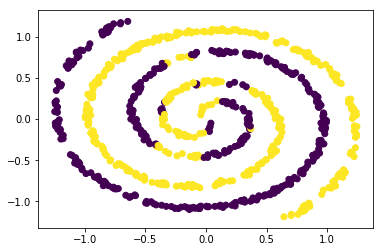

In [34]:
### Well, it worked this time... was not the case with regression problem
%matplotlib inline
yout_ = net_.forward(xx)
out_ = (yout_>0.5).reshape(-1)
plt.scatter(x1, x2, c=out_)

## Add New Layer to the first layer

In [35]:
n_hidden2 = 7
optimizer = tnn.SGD()
w1_layer = tnn.WeightsLayer(2, n_hidden2, optimizer=optimizer)
w2_layer = tnn.WeightsLayer(n_hidden2, n_hidden, optimizer=optimizer)

for epoch in range(100000):
    wout = w2_layer.forward(w1_layer.weights)
    dw = wout - layer1.weights
    dw1 = w2_layer.backward(dw/dw.shape[1]) 
    w1_layer.del_weights = dw1
    
    w2_layer.update()
    w1_layer.update()
    
    if epoch%10000 == 0:
        error__ = (dw**2).mean()
        print(epoch, 'Error = ', error__)

0 Error =  10.059141564019466
10000 Error =  8.597398388245046e-29
20000 Error =  8.597398388245046e-29
30000 Error =  8.597398388245046e-29
40000 Error =  8.597398388245046e-29
50000 Error =  8.597398388245046e-29
60000 Error =  8.597398388245046e-29
70000 Error =  8.597398388245046e-29
80000 Error =  8.597398388245046e-29
90000 Error =  8.597398388245046e-29


In [36]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden2,
                          weights=copy.deepcopy(w1_layer.weights),
                          optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden2, n_hidden,
                          weights=np.vstack([w2_layer.weights, w2_layer.weights]),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
layer3_ = tnn.DoubleReluLinearLayer(n_hidden,1,
                          weights=copy.deepcopy(layer2.weights),
                          bias = copy.deepcopy(layer2.bias),
                          optimizer=optimizer)
layer4_ = tnn.Sigmoid()

In [37]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout_ = net_.forward(xx)
    dy_ = yout_ - yy
    dx_ = net_.backward(dy_)
    
#     net_.update()
    layer1_.update()
    layer2_.update()
    
    if epoch%100 == 0:
        error_ = tnn.CrossEntropyBinary().loss(yout_, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error_)
        ax.clear()
        
        out = (yout_>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error_ < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5753820970475895


100 Error =  0.5545687119473848


200 Error =  0.519713870562653


300 Error =  0.46450451941553256


400 Error =  0.29988685285853867


500 Error =  0.15465711548939787


600 Error =  0.1072128200226847


700 Error =  0.08041965961707861


800 Error =  0.0645450799745406


900 Error =  0.05339301032742599


1000 Error =  0.04511051278551081


1100 Error =  0.038673123448436666


1200 Error =  0.03363479093413448


1300 Error =  0.029587690324528158


1400 Error =  0.0263105740090159


1500 Error =  0.023720433728027776


1600 Error =  0.021569429810089837


1700 Error =  0.019762476641950893


1800 Error =  0.018248346892451063


1900 Error =  0.016946984834505057


2000 Error =  0.01567841314160309


2100 Error =  0.014649903923430354


2200 Error =  0.013767682948404468


2300 Error =  0.012960599443528922


2400 Error =  0.012232112619719437


2500 Error =  0.011567532646791844


2600 Error =  0.010966978166662653


2700 Error =  0.010407261204338509

TclError: invalid command name "pyimage79"

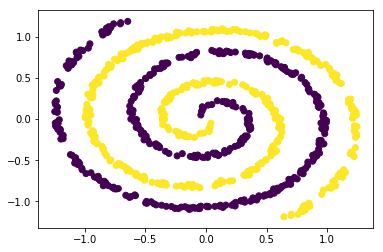

In [38]:
### It works even better.. it fitted even to our threshold
%matplotlib inline
yout_ = net_.forward(xx)
out_ = (yout_>0.5).reshape(-1)
plt.scatter(x1, x2, c=out_)

### Training the same network from scratch

In [39]:
n_hidden2, n_hidden

(7, 7)

In [40]:
optimizer = tnn.Adam()

net_0 = tnn.AutoForm(new_layers=True)
layer1_0 = tnn.LinearLayer(2, n_hidden2,
                          optimizer=optimizer)
layer2_0 = tnn.DoubleReluLinearLayer(n_hidden2, n_hidden,
                                    optimizer=optimizer)
layer3_0 = tnn.DoubleReluLinearLayer(n_hidden,1,
                                    optimizer=optimizer)

In [41]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout_0 = net_0.forward(xx)
    dy_0 = yout_0 - yy
    dx_0 = net_0.backward(dy_0)
    
    net_0.update()
    
    if epoch%100 == 0:
        error_0 = tnn.CrossEntropyBinary().loss(yout_0, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error_0)
        ax.clear()
        
        out = (yout_0>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error_0 < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  4.666500460072522


100 Error =  0.6243466468780771


200 Error =  0.6038839956235432


300 Error =  0.5877642913122583


400 Error =  0.47079574421704884


500 Error =  0.43527334468165607


600 Error =  0.2841246693691317


700 Error =  0.21113424195621086


800 Error =  0.092221149050415


900 Error =  0.0784456209399663


1000 Error =  0.0728536268741973


1100 Error =  0.06633385723932493


1200 Error =  0.0652706185170259


1300 Error =  0.05952891240165706


1400 Error =  0.05685631878784072


1500 Error =  0.052105627776885675


1600 Error =  0.046800248841381675


1700 Error =  0.04394516925613406


1800 Error =  0.046100660533321826


1900 Error =  0.04176551813176579


2000 Error =  0.04051739081985641


2100 Error =  0.04333126879341618


2200 Error =  0.039732623475243936


2300 Error =  0.04338229423841039


2400 Error =  0.04032966178520512


2500 Error =  0.03885250732641


2600 Error =  0.037949536657478175


2700 Error =  0.037387888083123044


2800 Error =

TclError: invalid command name "pyimage92"

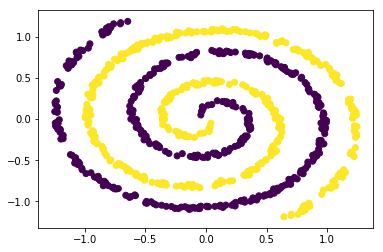

In [42]:
### It doesnt perform as good as dynamically added case
%matplotlib inline
yout_0 = net_0.forward(xx)
out = (yout_0>0.5).reshape(-1)
plt.scatter(x1, x2, c=out)

### Finding the decision boundary of the surface -- the dynamic case

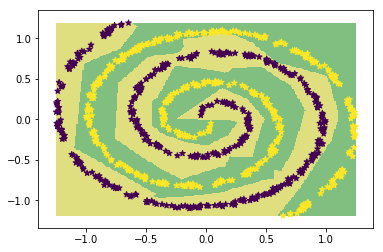

In [43]:
h = 0.01
x_, y_ = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xx_img = np.c_[x_.ravel(), y_.ravel()]
yout_img = net_.forward(xx_img)
# out = (yout_img>0.5).reshape(-1).astype(int)
out = yout_img

colors = ['r', 'y', 'g', 'b']
plt.imshow(out.reshape(x_.shape), interpolation='nearest',
           extent=(x_.min(), x_.max(), y_.min(), y_.max()),
           cmap=matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')